# Model cross-validation

Here we validate attention model over 3 datasets. We take a single dataset for model training and evalute the trained model on each dataset. Then the next dataset is selected for model training and so on. As an output we obtain correlation matrices 3x3 one for each metrics. We will measure a model accuracy by L1 metric, mean trace-wise correlation coefficient and by windowed cpectral metric.

Import cross-validation utils:

In [1]:
import numpy as np

from cv_utils import *

%env CUDA_VISIBLE_DEVICES=4

env: CUDA_VISIBLE_DEVICES=4


Define datasets and its parameters. Note we use scale coeffitients to equalize the dataset:

In [2]:
datasets = {'ds1': {'path_raw': '/data/NA/noise_dataset_1/DN02A_LIFT_AMPSCAL.sgy',
                    'path_lift': '/data/NA/noise_dataset_1/DN02B_SHOTS_LIFT1.sgy',
                    'tsize': 3000,
                    'offset_lim': None,
                    'scale_coef': 1.},
            'ds2': {'path_raw': '/data/NA/noise_dataset_2/D01_for_Lift.sgy',
                    'path_lift': '/data/NA/noise_dataset_2/D02_Lift_SP.sgy',
                    'tsize': 2000,
                    'offset_lim': 2000,
                    'scale_coef': 3.},
            'ds3': {'path_raw': '/data/NA/noise_dataset_3/5_NA-gr_input_raw.sgy',
                    'path_lift': '/data/NA/noise_dataset_3/5_NA-gr_output_lift5.sgy',
                    'tsize': 3000,
                    'offset_lim': None,
                    'scale_coef': 0.00045}}

In [3]:
tmp_dump_path = './tmp'
output_path = './processed/merged.sgy'

for t_key, t_params in datasets.items():
    print('Train {}'.format(t_key))
    train_pipeline = train_model(t_params['path_raw'], t_params['path_lift'],
                                 train_fields_number=10, batch_size=64, n_epochs=3,
                                 offset_lim=t_params['offset_lim'], tsize=t_params['tsize'],
                                 scale_coef=t_params['scale_coef'])
    for v_key, v_params in datasets.items():
        print('Inference {}'.format(v_key))
        inference_model(v_params['path_raw'], train_pipeline, tmp_dump_path, output_path,
                        tsize=v_params['tsize'], scale_coef=v_params['scale_coef'])

        print('Evaluate {}'.format(v_key))
        evaluate(output_path, v_params['path_lift'], 'metrics_{}_{}.npz'.format(t_key, v_key),
                 tsize=v_params['tsize'], scale_coef=v_params['scale_coef'])

Train ds3


100%|██████████| 1539/1539 [12:29<00:00,  2.07it/s]


Inference ds3


100%|█████████▉| 310/311 [13:24<00:02,  2.57s/it]


Merging files


100%|██████████| 311/311 [03:15<00:00,  1.68it/s]


Evaluate ds3


100%|█████████▉| 200/201 [06:53<00:01,  1.95s/it]


Inference ds2


 97%|█████████▋| 37/38 [01:07<00:01,  1.82s/it]


Merging files


100%|██████████| 38/38 [00:21<00:00,  1.80it/s]


Evaluate ds2


 99%|█████████▉| 90/91 [00:24<00:00,  4.74it/s]


Inference ds1


 99%|█████████▊| 70/71 [02:47<00:02,  2.48s/it]


Merging files


100%|██████████| 71/71 [00:42<00:00,  1.85it/s]


Evaluate ds1


 98%|█████████▊| 50/51 [00:40<00:00,  1.22it/s]


Train ds2


100%|██████████| 312/312 [01:09<00:00,  4.99it/s]


Inference ds3


100%|█████████▉| 310/311 [13:30<00:02,  2.62s/it]


Merging files


100%|██████████| 311/311 [03:08<00:00,  1.75it/s]


Evaluate ds3


100%|█████████▉| 200/201 [06:54<00:01,  1.92s/it]


Inference ds2


 97%|█████████▋| 37/38 [01:07<00:01,  1.83s/it]


Merging files


100%|██████████| 38/38 [00:20<00:00,  1.91it/s]


Evaluate ds2


 99%|█████████▉| 90/91 [00:25<00:00,  4.14it/s]


Inference ds1


 99%|█████████▊| 70/71 [02:47<00:02,  2.45s/it]


Merging files


100%|██████████| 71/71 [00:41<00:00,  1.80it/s]


Evaluate ds1


 98%|█████████▊| 50/51 [00:40<00:00,  1.22it/s]


Train ds1


100%|█████████▉| 1619/1620 [06:23<00:00,  4.39it/s]


Inference ds3


100%|█████████▉| 310/311 [13:23<00:02,  2.62s/it]


Merging files


100%|██████████| 311/311 [03:10<00:00,  1.72it/s]


Evaluate ds3


100%|█████████▉| 200/201 [07:02<00:01,  1.98s/it]


Inference ds2


 97%|█████████▋| 37/38 [01:07<00:01,  1.86s/it]


Merging files


100%|██████████| 38/38 [00:21<00:00,  1.85it/s]


Evaluate ds2


 99%|█████████▉| 90/91 [00:25<00:00,  4.14it/s]


Inference ds1


 99%|█████████▊| 70/71 [02:45<00:02,  2.44s/it]


Merging files


100%|██████████| 71/71 [00:43<00:00,  1.87it/s]


Evaluate ds1


 98%|█████████▊| 50/51 [00:39<00:00,  1.35it/s]


Plot correlation matrices:

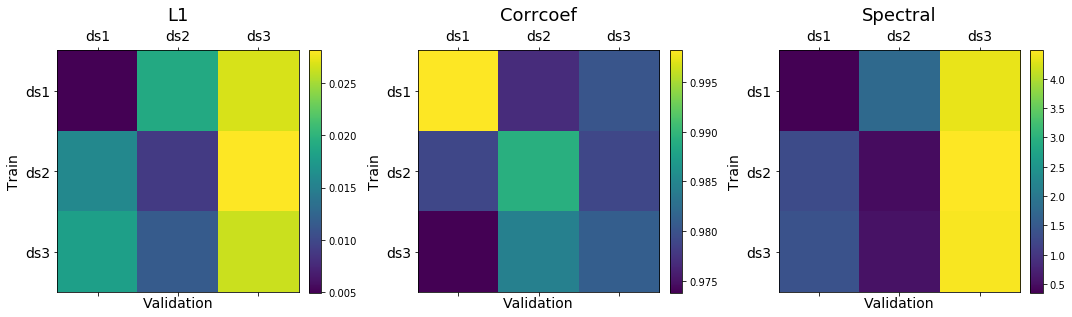

In [5]:
show_cv(sorted(datasets.keys()))